# Quantified-Mind.com Data Analysis

The goal of this example notebook to take the results of a testing export from Quantified Mind and do some data analysis to look at the effects. 

### What is Quantified Mind? 

[Quantified-Mind.com](http://www.quantified-mind.com/about) is a free website that lets you take neuropsychological tests to measure your basic cognitive abilities, like reaction time, attention, memory, etc. It is designed so you quantify how lifestyle (sleep, exercise, time of day) and intervention factors (meditation, caffeine, nootropics, etc.) affect your cognition. 

------

### EXAMPLE: Meditation Effect on Attention

__Did doing meditating make your smarter or improve your attention? Find out!__  

This sample data analysis followed the [Meditation Experiment](http://www.quantified-mind.com/experiment/meditation), a 28-session test to see if meditation improves attention and information processing.   

NOTE: If you did a different experiment, you'll need to tweak a few of the fields and references to make it work. 

The only real requirement is installing the standard dependendicies, uploading your data the directory, and confirming reference in the import. 

------

### Libraries

In [22]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

----

# Data Preparation and Processing

In [3]:
# import the data
data = pd.read_csv("data/quantified-mind-meditation.csv")

In [4]:
data.columns = ['Session', 
                'Date', 
                'Time', 
                'Any other comments?', 
                'Before / After',
                'Meditate / Activity',
                'Activity Minutes',
                'Activity Name',
                'Cued Attention (dot)',
                'Go / No-Go'
               ]

In [5]:
# cleanup the data frame
data['Session'] = data['Session'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Date'] = data['Date'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Time'] = data['Time'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Any other comments?'] = data['Any other comments?'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Before / After'] = data['Before / After'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Meditate / Activity'] = data['Meditate / Activity'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Activity Name'] = data['Activity Name'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip(', ').rstrip('\''))
data['Activity Minutes'] = data['Activity Minutes'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Cued Attention (dot)'] = data['Cued Attention (dot)'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Go / No-Go'] = data['Go / No-Go'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))

In [6]:
# Numbers
data['Activity Minutes'] = data['Activity Minutes'].astype(float)
data['Cued Attention (dot)'] = data['Cued Attention (dot)'].astype(float)
data['Go / No-Go'] = data['Go / No-Go'].astype(float)

In [7]:
# Timestamps
data['Timestamp'] = data['Date'] + ' ' + data['Time']
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [8]:
data['Situation'] = data['Before / After'] + '-' + data['Meditate / Activity']

In [56]:
# Categorical Data
data['Before / After'] = data['Before / After'].astype('category')
data['Before / After'] = data['Before / After'].cat.reorder_categories(['Before', 'After'])
data['Meditate / Activity'] = data['Meditate / Activity'].astype('category')
data['Situation'] = data['Situation'].astype('category') 
data['Situation'] = data['Situation'].cat.reorder_categories(['Before-Meditate', 
                                                                   'After-Meditate',
                                                                   'Before-Activity', 
                                                                   'After-Activity'])

In [37]:
data['Situation'].unique()

[Before-Meditate, After-Meditate, Before-Activity, After-Activity]
Categories (4, object): [Before-Meditate, After-Meditate, Before-Activity, After-Activity]

In [10]:
# drop a renegade row
data = data.drop(data.index[0])

In [155]:
# Expoort Cleaned Up Data
data.to_csv('data/Quantified-Mind-Meditation-Processed.csv')

In [13]:
# checks
len(data)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 28
Data columns (total 12 columns):
Session                 28 non-null object
Date                    28 non-null object
Time                    28 non-null object
Any other comments?     28 non-null object
Before / After          28 non-null category
Meditate / Activity     28 non-null category
Activity Minutes        28 non-null float64
Activity Name           28 non-null object
Cued Attention (dot)    28 non-null float64
Go / No-Go              28 non-null float64
Timestamp               28 non-null datetime64[ns]
Situation               28 non-null category
dtypes: category(3), datetime64[ns](1), float64(3), object(5)
memory usage: 2.6+ KB


,Session,Date,Time,Any other comments?,Before / After,Meditate / Activity,Activity Minutes,Activity Name,Cued Attention (dot),Go / No-Go,Timestamp,Situation
1,2,2019-06-23,10:03:28,Post-Morning Coffee,Before,Meditate,0.00,None,441.605,506.856,2019-06-23 10:03:28,Before-Meditate
2,3,2019-06-23,10:38:57,,After,Meditate,10.02,,491.179,522.476,2019-06-23 10:38:57,After-Meditate
3,4,2019-06-24,09:52:38,Post-Coffee,Before,Activity,0.00,,497.041,564.865,2019-06-24 09:52:38,Before-Activity
4,5,2019-06-24,10:11:13,,After,Activity,9.90,Nonfiction Book Reading,543.290,569.169,2019-06-24 10:11:13,After-Activity
5,6,2019-06-26,09:16:49,Post-Morning Coffee,Before,Activity,0.00,,503.790,552.583,2019-06-26 09:16:49,Before-Activity


------

# Data Exploration of Effects using Data Visualization

In [140]:
data.describe()

,Activity Minutes,Cued Attention (dot),Go / No-Go
count,28.000000,28.000000,28.000000
mean,5.286429,548.027857,540.859429
std,5.541729,39.126523,54.508958
min,0.000000,441.605000,402.447000
25%,0.000000,522.601500,506.051500
50%,4.830000,550.109000,548.197000
75%,9.900000,581.562750,582.992500
max,17.040000,603.050000,622.755000


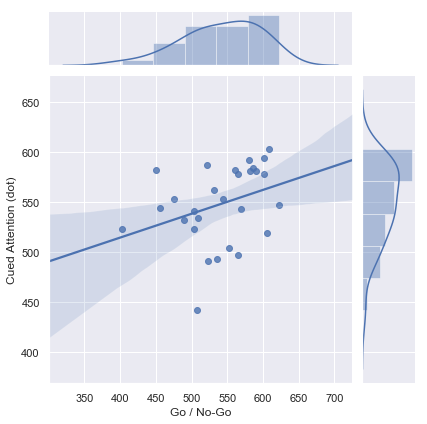

In [195]:
ax = sns.jointplot(x="Go / No-Go", y="Cued Attention (dot)", data=data, kind="reg");
plt.show()

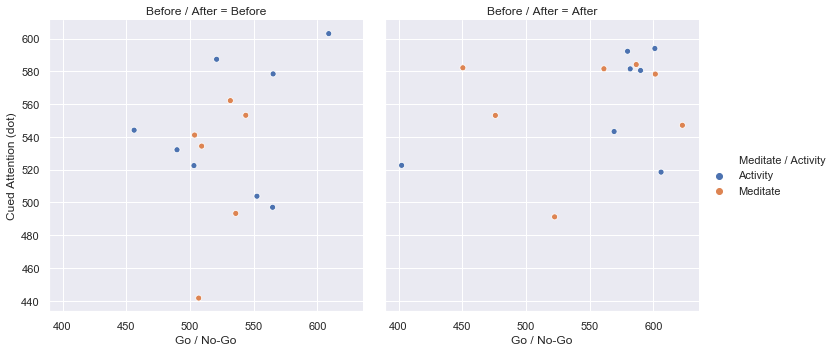

In [197]:
# is there some relationship b/t two tests? 
ax = sns.relplot(x="Go / No-Go", y="Cued Attention (dot)", col="Before / After", hue="Meditate / Activity", data=data);

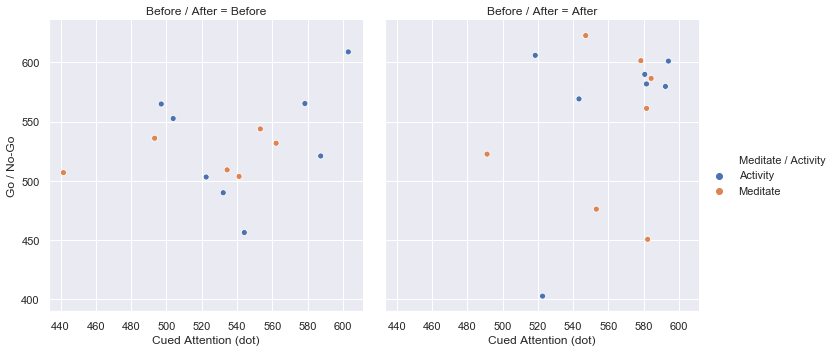

In [116]:
sns.relplot(x="Cued Attention (dot)", y="Go / No-Go", col="Before / After", hue="Meditate / Activity", data=data);

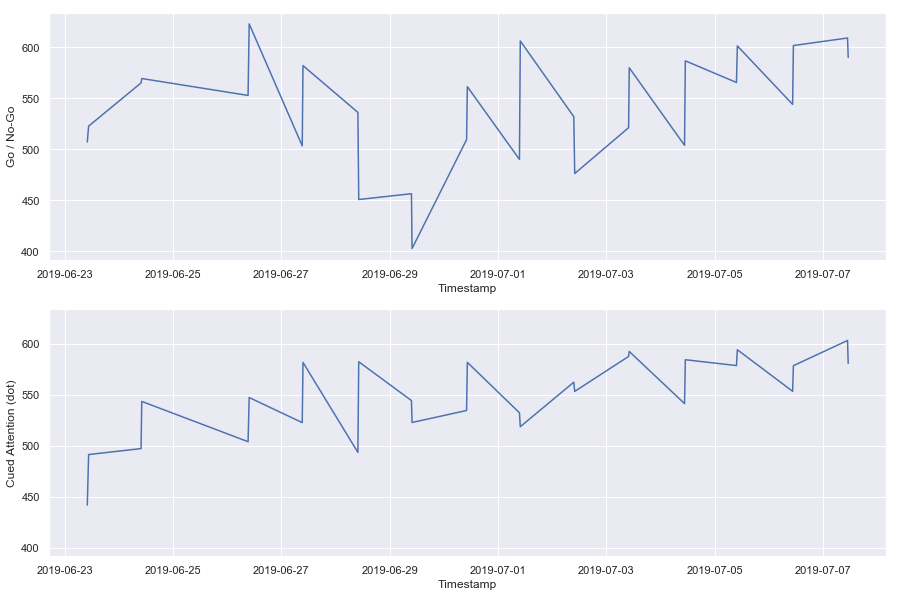

In [201]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", data=data, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", data=data, ax=ax2)
plt.close(2)
plt.close(3)
plt.show()

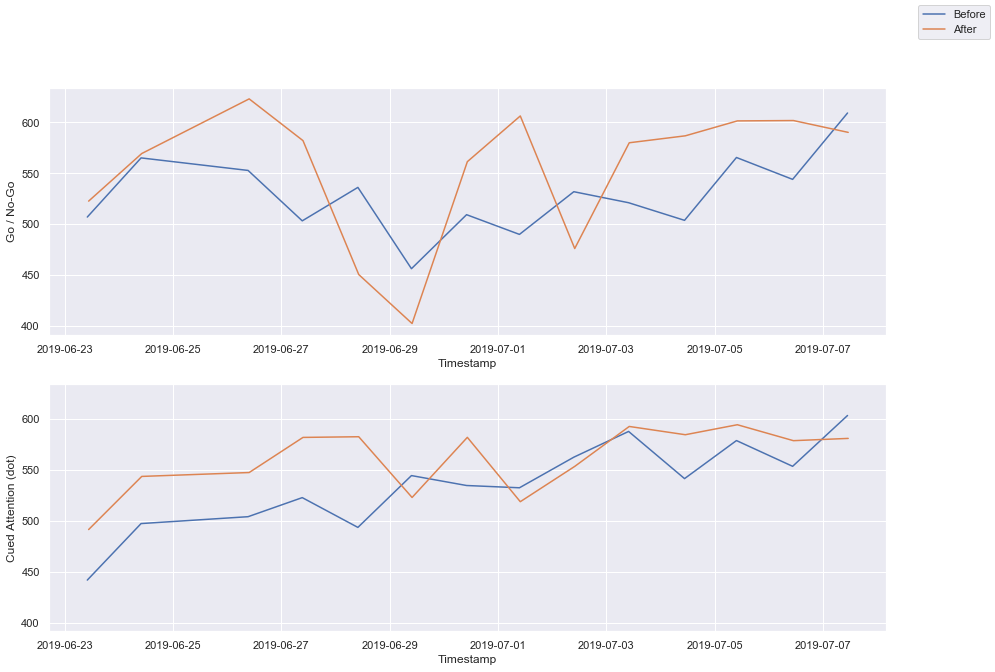

In [203]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", hue='Before / After', data=data, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", hue='Before / After', data=data, ax=ax2)
fig.legend(labels=['Before','After'])
plt.close(2)
plt.close(3)
plt.show()

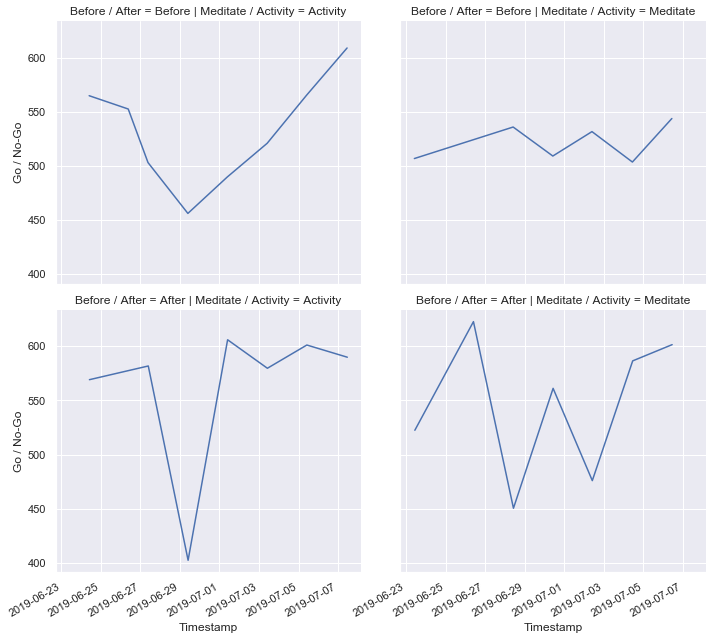

In [77]:
g = sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", data=data,  row="Before / After", col="Meditate / Activity")
g.fig.autofmt_xdate()

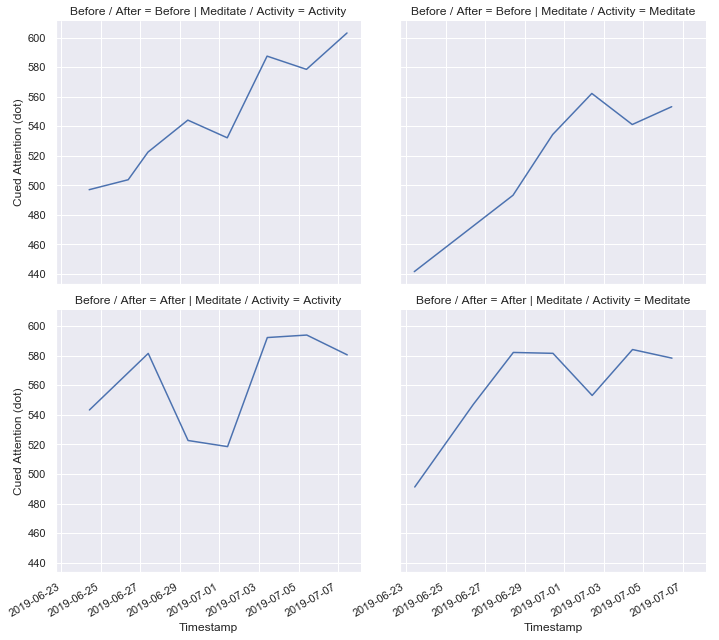

In [114]:
g = sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", data=data,  row="Before / After", col="Meditate / Activity")
g.fig.autofmt_xdate()

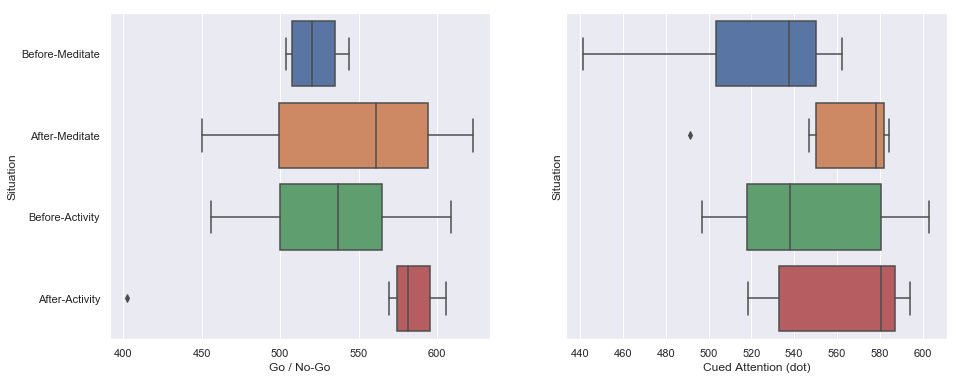

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
sns.boxplot(x="Go / No-Go", y='Situation', data=data, ax=ax1)
sns.boxplot(x="Cued Attention (dot)", y='Situation', data=data, ax=ax2)
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

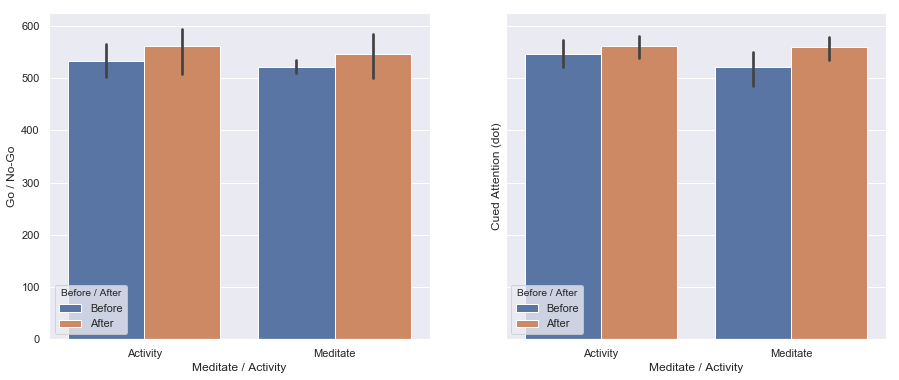

In [209]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
sns.catplot(x="Meditate / Activity", y="Go / No-Go", hue="Before / After", kind="bar", data=data, ax=ax1);
sns.catplot(x="Meditate / Activity", y="Cued Attention (dot)", hue="Before / After", kind="bar", data=data, ax=ax2);
plt.close(2)
plt.close(3)
plt.show()

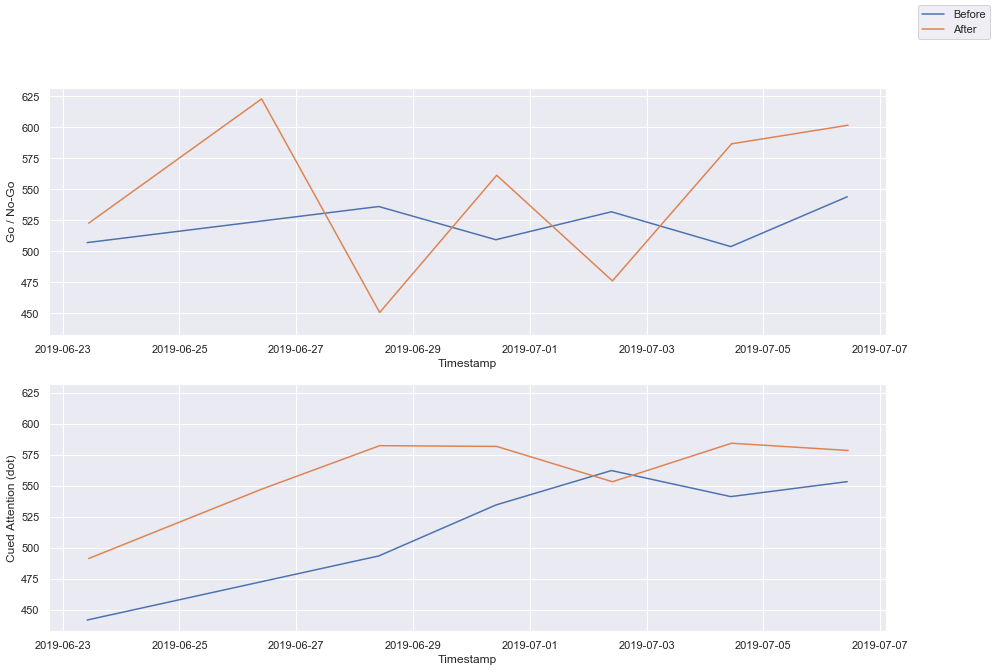

In [207]:
### Plot Meditation Effects Trends
meditatation = data[(data['Meditate / Activity'] == 'Meditate')]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", hue='Before / After', data=meditatation, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", hue='Before / After', data=meditatation, ax=ax2)
fig.legend(labels=['Before','After'])
plt.close(2)
plt.close(3)
plt.show()

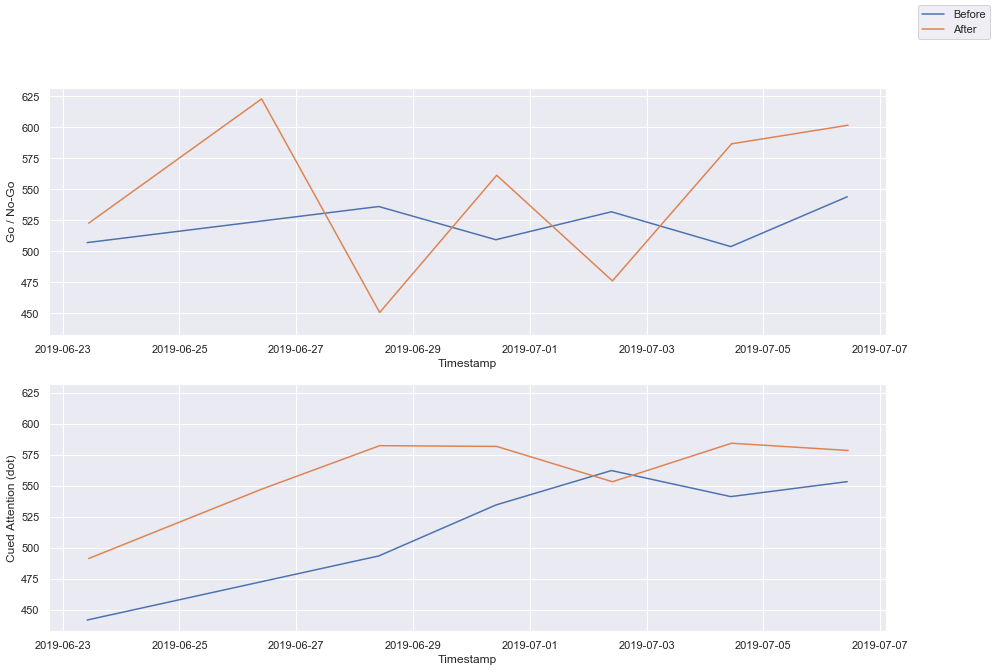

In [211]:
### Plot Activity Effects Trends
activity = data[(data['Meditate / Activity'] == 'Activity')]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", hue='Before / After', data=meditatation, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", hue='Before / After', data=meditatation, ax=ax2)
fig.legend(labels=['Before','After'])
plt.close(2)
plt.close(3)
plt.show()